In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as fit

Initial slope: 3.61e-06 ± 8.74e-09 kg·m²/s²
Intercept: 1.53e-06 ± 1.75e-08 kg·m²


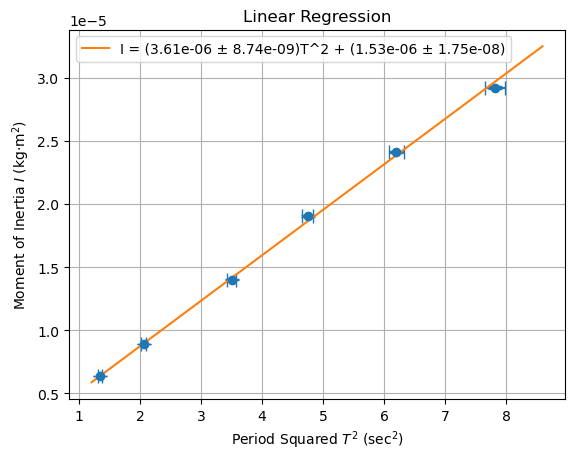

In [2]:
# data
Tsquared = np.array([1.34, 2.06, 3.50, 4.75, 6.20, 7.81])
alpha_Tsquared = np.array([0.03, 0.04, 0.07, 0.09, 0.12, 0.16])

I = np.array([6.37e-6, 8.91e-6, 13.99e-6, 19.07e-6, 24.15e-6, 29.23e-6])
alpha_I = np.array([0.01e-6, 0.02e-6, 0.04e-6, 0.06e-6, 0.08e-6, 0.1e-6])

# model
def linear(Tsquared, m, c):
    return m * Tsquared + c

# linear regression
params, cov = fit.curve_fit(linear, Tsquared, I, sigma=alpha_I, absolute_sigma=True)
kappa0, c0 = params
kappa0_err, c0_err = np.sqrt(np.diag(cov))

T2_fit = np.linspace(min(Tsquared)*0.9, max(Tsquared)*1.1, 100)
I_fit = linear(T2_fit, kappa0, c0)

print(f"Initial slope: {kappa0:.2e} ± {kappa0_err:.2e} kg·m²/s²")
print(f"Intercept: {c0:.2e} ± {c0_err:.2e} kg·m²")

# plotting
plt.errorbar(Tsquared, I, xerr=alpha_Tsquared, yerr=alpha_I, fmt="o", capsize=5)
plt.plot(T2_fit, I_fit, 
         label=f"I = ({kappa0:.2e} ± {kappa0_err:.2e})T^2 + ({c0:.2e} ± {c0_err:.2e})")
plt.xlabel("Period Squared $T^2$ (sec$^2$)")
plt.ylabel("Moment of Inertia $I$ (kg·m$^2$)")
plt.title("Linear Regression")
plt.legend()
plt.grid(True)
plt.show()

Weighted fit slope: 3.61e-06 ± 8.86e-09 kg·m²/s²
Weighted fit intercept: 1.53e-06 ± 1.79e-08 kg·m²


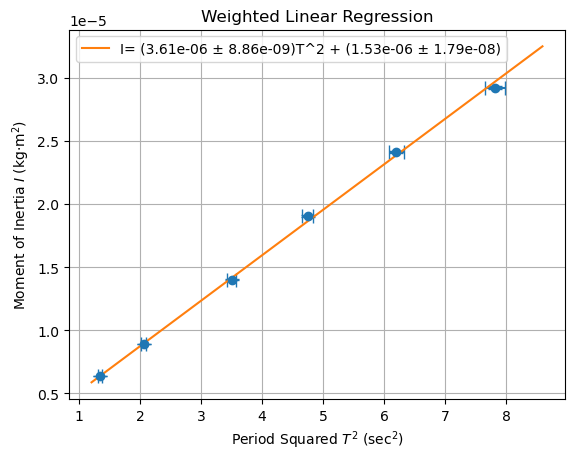

In [3]:
alpha_I0 = (kappa0 * alpha_Tsquared) / (4 * (np.pi ** 2))
alpha_I_prime = np.sqrt((alpha_I ** 2) + (alpha_I0 ** 2))

# weighted linear regression
wparams, wcov = fit.curve_fit(linear, Tsquared, I, sigma=alpha_I_prime, absolute_sigma=True)
kappa, c = wparams
kappa_err, c_err = np.sqrt(np.diag(wcov))

print(f"Weighted fit slope: {kappa:.2e} ± {kappa_err:.2e} kg·m²/s²")
print(f"Weighted fit intercept: {c:.2e} ± {c_err:.2e} kg·m²")

# plotting
plt.errorbar(Tsquared, I, xerr=alpha_Tsquared, yerr=alpha_I_prime, fmt='o', capsize=5)
T2_fit = np.linspace(min(Tsquared)*0.9, max(Tsquared)*1.1, 100)
plt.plot(T2_fit, linear(T2_fit, kappa, c), 
         label=f"I= ({kappa:.2e} ± {kappa_err:.2e})T^2 + ({c:.2e} ± {c_err:.2e})")
plt.xlabel("Period Squared $T^2$ (sec$^2$)")
plt.ylabel("Moment of Inertia $I$ (kg·m$^2$)")
plt.title("Weighted Linear Regression")
plt.legend()
plt.grid(True)
plt.show()